In [7]:
import matplotlib.pyplot as plt
import numpy as np
from plots import get_coherence
filepath = "C:\\Users\\Owner\\OneDrive\\Documents\\GitHub\\SOAEpeaks\\Data\\"
filename = 'ACfls27rearSOAEwfD01.txt'
wf = np.loadtxt(filepath + filename)
sr = 44100
wf_title = "Lizard SOAE Waveform"

fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
fftshifted!
ffts

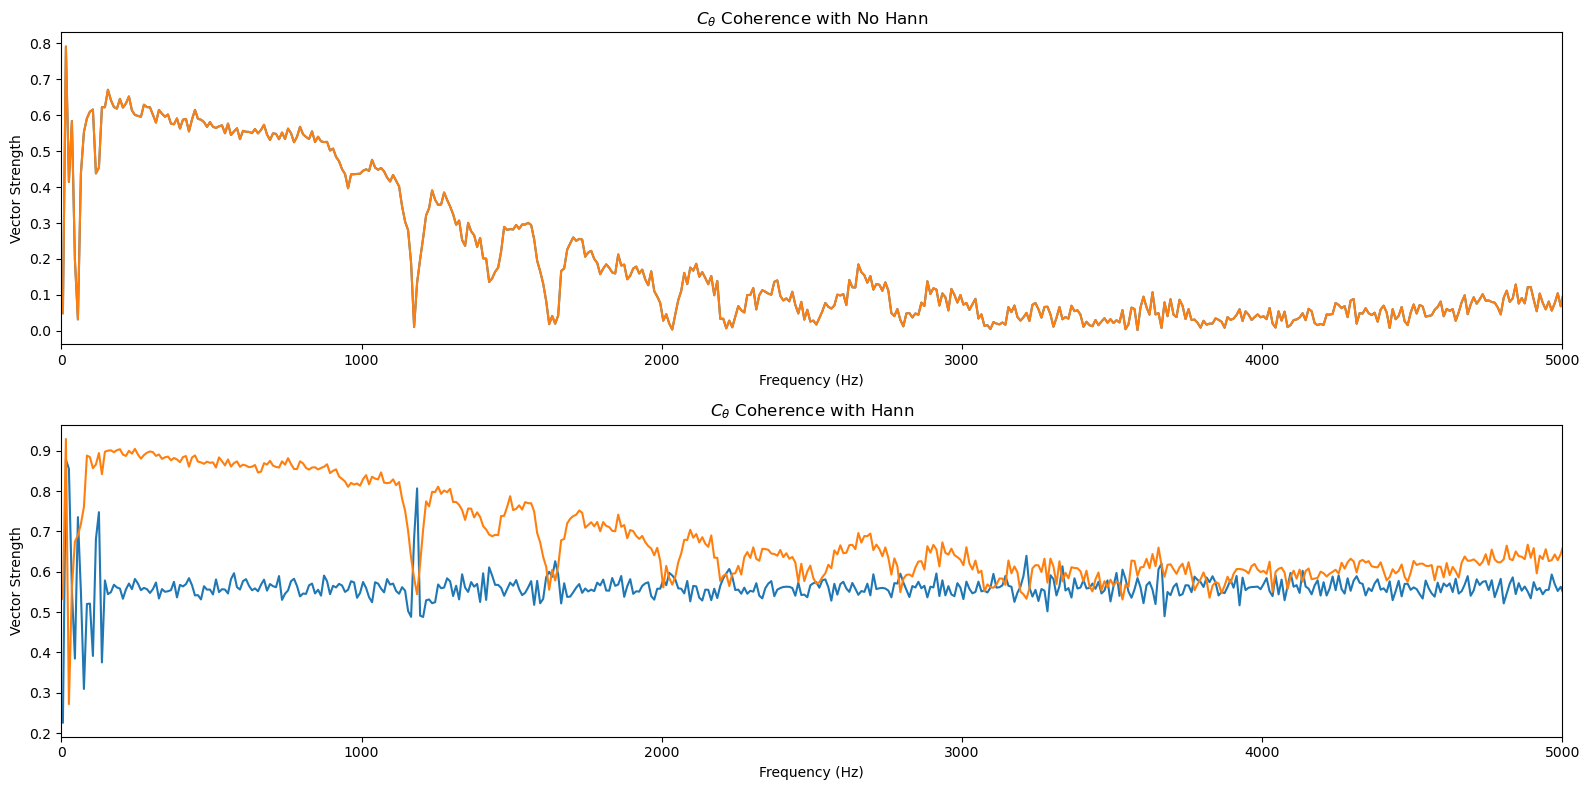

In [ ]:
n = 2
plt.figure(figsize=(16, 8))

i = 1
for hann_title, win_type in zip(["No Hann", "Hann"], ["boxcar", "hann"]):
    plt.subplot(2, 1, i)
    plt.title(r"$C_{\theta}$ Coherence with " + f"{hann_title}")
    plt.ylabel("Vector Strength")
    plt.xlabel("Frequency (Hz)")
    plt.xlim(0, 5000)
    
    d = get_coherence(wf, sr, tau=0.1, ref_type="next_freq", win_type=win_type, fftshift_segs=False, return_all=True)
    coherence = d["coherence"]
    phase_diffs = d["phase_diffs"]
    f = d["freq_ax"]
    
    plt.plot(f, coherence, label='No FFTShift')
    
    d = get_coherence(wf, sr, tau=0.1, ref_type="next_freq", win_type=win_type, fftshift_segs=True, return_all=True)
    coherence = d["coherence"]
    phase_diffs = d["phase_diffs"]
    f = d["freq_ax"]
    
    plt.plot(f, coherence, label='FFTShifted')
    plt.legend(loc="upper right")
    i += 1
plt.tight_layout()
plt.show()


In [83]:
d = np.empty(2, dtype=object)
for i, hann in enumerate([False, True]):
    d[i] = get_coherence(wf, sr, t_win=0.1, ref_type="next_freq", hann=hann, return_all=True)
f = d[0]["freq_ax"]

(1200, 2205)
399
2500
(1200, 2205)
399
2500


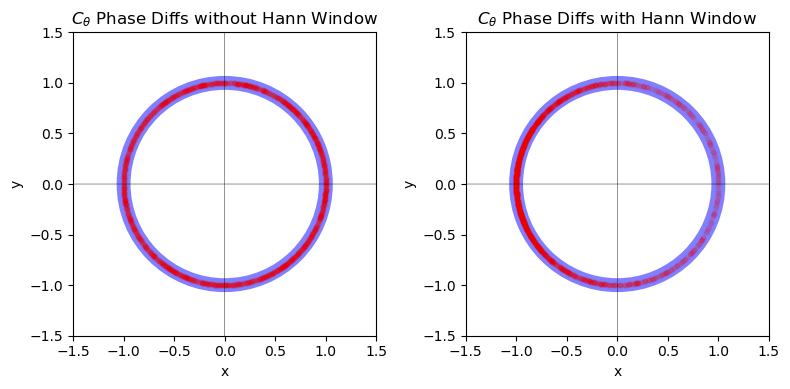

In [116]:
plt.figure(figsize=(8, 16))

for i, hann in enumerate([False, True]):
    phase_diffs = d[i]["phase_diffs"]
    print(np.shape(phase_diffs))
    f_min = 4000
    f_max = 5000
    f_min_idx = (np.abs(f - f_min)).argmin()  # find index of closest value to f - f_min
    f_max_idx = (np.abs(f - f_max)).argmin()  # find index of closest value to f - f_max
    print(f_min_idx)
    angles = phase_diffs[0:25, f_min_idx:f_max_idx].flatten()
    # Compute Cartesian coordinates (x, y) on the unit circle
    x = np.cos(angles)
    y = np.sin(angles)

    print(len(x))


    # Plot the circle
    circle = plt.Circle((0, 0), 1, color='blue', fill=False, linewidth=10, alpha=0.5)  # Unit circle

    plt.subplot(1, 2, i + 1)
    ax = plt.gca()
    ax.add_patch(circle)

    # Plot the points
    ax.scatter(x, y, color='red', label='Points on Circle', s=10, alpha=0.05)
    ax.plot(np.zeros(len(angles)), np.linspace(-1.5, 1.5, len(angles)), color='black', lw=0.3)
    ax.plot(np.linspace(-1.5, 1.5, len(angles)), np.zeros(len(angles)), color='black', lw=0.3)

    # Set equal scaling so the circle isn't distorted
    ax.set_aspect('equal')

    # Add labels and legend
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    if hann:
        t = "with"
    else:
        t = "without"
    ax.set_title(r"$C_\theta$ Phase Diffs" + f" {t} Hann Window")

# Show the plot
plt.tight_layout()
plt.show()

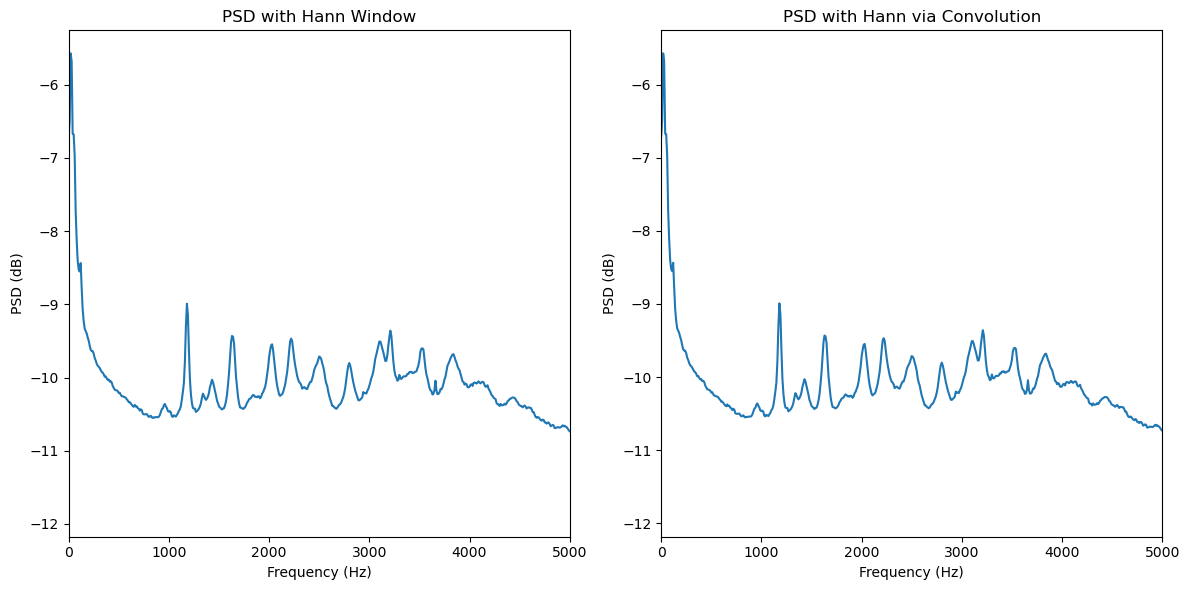

Average difference between hann in time domain and hann via convolution:
-3.857476846173336e-12
Average difference between hann in time domain and boxcar:
4.563106736834621e-09
Average difference between hann in time domain and hann via convolution (LOG SCALE):
-7.853250959686038e-05
Average difference between hann via convolution and boxcar (LOG SCALE):
0.4874758678005013


In [ ]:
d_hann = get_spectrum(wf, sr, t_win=0.1, hann=True, return_all=True)
d_conv = get_spectrum(wf, sr, t_win=0.1, hann='conv', return_all=True)
d_boxcar = get_spectrum(wf, sr, t_win=0.1, hann=False, return_all=True)

f = d_hann["freq_ax"]
psd_hann = d_hann["psd"]
psd_conv = d_conv["psd"]
psd_boxcar = d_boxcar["psd"]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(f, np.log10(psd_hann))
plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD (dB)")
plt.xlim(0, 5000)
plt.title("PSD with Hann Window")
plt.subplot(1, 2, 2)
plt.plot(f, np.log10(psd_conv))
plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD (dB)")
plt.xlim(0, 5000)
plt.title("PSD with Hann via Convolution")
plt.tight_layout()
plt.show()


print("Average difference between hann in time domain and hann via convolution:")
print(np.mean(psd_hann - psd_conv))
print("Average difference between hann in time domain and boxcar:")
print(np.mean(psd_boxcar - psd_hann))
print("Average difference between hann in time domain and hann via convolution (LOG SCALE):")
print(np.mean(np.log10(psd_hann) - np.log10(psd_conv)))
print("Average difference between hann via convolution and boxcar (LOG SCALE):")
print(np.mean(np.log10(psd_boxcar) - np.log10(psd_hann)))